<a href="https://colab.research.google.com/github/eleven111101/Lasso_Ridge_Regression_01/blob/main/LaRi_Insurance_Charge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
print("Hello_world")

Hello_world


In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [394]:
df=pd.read_csv("/content/insurance.csv")

In [395]:
df.shape

(1338, 7)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [397]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [398]:
# df.to_string()

In [399]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [400]:
df["sex"].unique()


array(['female', 'male'], dtype=object)

In [401]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [402]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='count'>

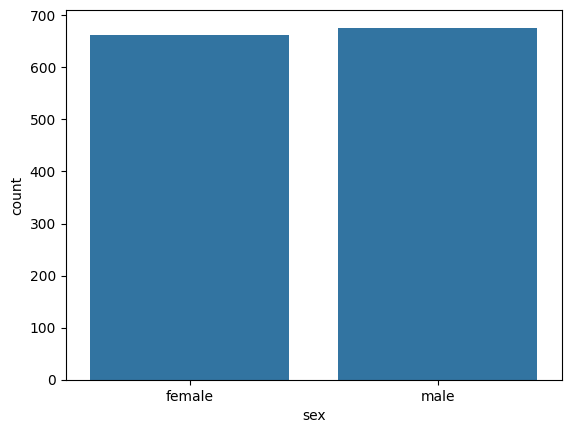

In [403]:
sns.countplot(x="sex",data=df)

In [404]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [405]:
df["sex"]=df["sex"].apply(lambda x: int(1 if x=="male" else 0))

In [406]:
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

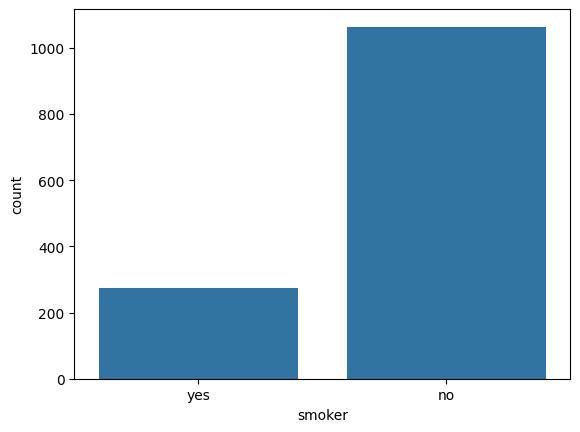

In [407]:
sns.countplot(x="smoker",data=df)

In [408]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [409]:
df["smoker"]=df["smoker"].apply(lambda x : int(1 if x=="yes" else 0))

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [411]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [412]:
# columns_for_dummy={
#     "southwest":"SW",
#     "southeast":"SE",
#     "northwest":"NW",
#     "northeast":"NE"
# }

In [413]:
# print(columns_for_dummy["southwest"])
# print(columns_for_dummy["southeast"])
# print(columns_for_dummy["northeast"])
# print(columns_for_dummy["northwest"])


In [414]:
# for key, value in columns_for_dummy.items():
#   print(key ,":", value)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [416]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [417]:
dummies = pd.get_dummies(df["region"],prefix = "reg" , drop_first=True)
df = pd.concat([df,dummies] , axis=1)
df = df.drop("region" , axis=1)

In [418]:
df.head()

,age,sex,bmi,children,smoker,charges,reg_northwest,reg_southeast,reg_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   int64  
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   int64  
 5   charges        1338 non-null   float64
 6   reg_northwest  1338 non-null   bool   
 7   reg_southeast  1338 non-null   bool   
 8   reg_southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 66.8 KB


In [420]:
df.corr()

,age,sex,bmi,children,smoker,charges,reg_northwest,reg_southeast,reg_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
reg_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
reg_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
reg_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

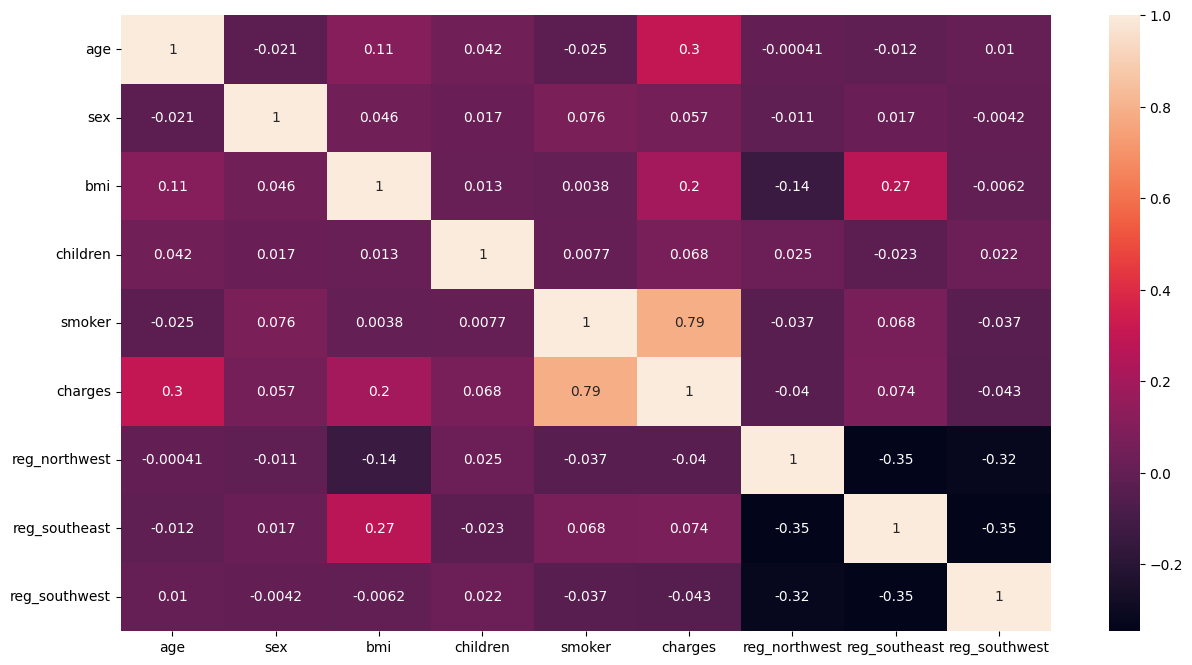

In [421]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [422]:
X = df.drop("charges" , axis=1)
y = df["charges"]

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [425]:
from sklearn.linear_model import LinearRegression

In [426]:
LI = LinearRegression()

In [427]:
LI.fit(X_train, y_train)

LinearRegression()

In [428]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [429]:
prediction = LI.predict(X_test)

In [430]:
print("Mean_absolute_error - ",mean_absolute_error(y_test , prediction))
print("Mean_squared_error - ",mean_squared_error(y_test , prediction))
print("Root_Mean_absolute_error - ",np.sqrt(mean_squared_error(y_test , prediction)))

Mean_absolute_error -  4193.463021932148
Mean_squared_error -  35090225.72562567
Root_Mean_absolute_error -  5923.700340633857


In [431]:
la = Lasso(alpha=50,tol=0.1,max_iter=1000)
la.fit(X_train,y_train)
la_predict = la.predict(X_test)

In [432]:
print("...Lasso_Regression...")
print("Mean_absolute_error - ",mean_absolute_error(y_test , la_predict))
print("Mean_squared_error - ",mean_squared_error(y_test , la_predict))
print("Root_Mean_absolute_error - ",np.sqrt(mean_squared_error(y_test , la_predict)))
print("R2_Score - ",r2_score(y_test , la_predict))


...Lasso_Regression...
Mean_absolute_error -  4221.355674670788
Mean_squared_error -  35260167.92904492
Root_Mean_absolute_error -  5938.027275875796
R2_Score -  0.7593896023729091


In [433]:
ri = Ridge(alpha=4)
ri.fit(X_train,y_train)
ri_predict = ri.predict(X_test)

In [434]:
print("...Ridge_Regression...")
print("Mean_absolute_error - ",mean_absolute_error(y_test , ri_predict))
print("Mean_squared_error - ",mean_squared_error(y_test , ri_predict))
print("Root_Mean_absolute_error - ",np.sqrt(mean_squared_error(y_test , ri_predict)))
print("R2_Score - ",r2_score(y_test , ri_predict))

...Ridge_Regression...
Mean_absolute_error -  4245.599893613198
Mean_squared_error -  35230974.80081858
Root_Mean_absolute_error -  5935.568616469578
R2_Score -  0.7595888121499201
